###Import library

In [1]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, os

###Unduh dataset

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-24 16:03:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.59MB/s    in 3m 37s  

2021-05-24 16:07:32 (1.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



###Ekstrak zip

In [3]:
zip_local = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

###Augmentasi gambar dan data generator

In [4]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    validation_split=0.4
)

In [5]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=5,
    seed=42,
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=5,
    seed=42,
    shuffle=False,
    subset="validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


###Membuat model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

###Training dan testing model

In [12]:
# Training model
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=75,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="loss",
            patience=10,
            restore_best_weights=True,
        )
    ]
)

Epoch 1/75
100/100 - 3s - loss: 0.1158 - accuracy: 0.9720 - val_loss: 0.2000 - val_accuracy: 0.9000
Epoch 2/75
100/100 - 3s - loss: 0.1227 - accuracy: 0.9479 - val_loss: 0.0930 - val_accuracy: 0.9600
Epoch 3/75
100/100 - 3s - loss: 0.1254 - accuracy: 0.9640 - val_loss: 0.2090 - val_accuracy: 0.9400
Epoch 4/75
100/100 - 3s - loss: 0.0990 - accuracy: 0.9679 - val_loss: 0.1009 - val_accuracy: 0.9400
Epoch 5/75
100/100 - 3s - loss: 0.1003 - accuracy: 0.9700 - val_loss: 0.2095 - val_accuracy: 0.9600
Epoch 6/75
100/100 - 3s - loss: 0.1416 - accuracy: 0.9580 - val_loss: 0.1857 - val_accuracy: 0.9400
Epoch 7/75
100/100 - 3s - loss: 0.1363 - accuracy: 0.9580 - val_loss: 0.1551 - val_accuracy: 0.9200
Epoch 8/75
100/100 - 3s - loss: 0.1189 - accuracy: 0.9579 - val_loss: 0.2208 - val_accuracy: 0.9200
Epoch 9/75
100/100 - 3s - loss: 0.1247 - accuracy: 0.9519 - val_loss: 0.1051 - val_accuracy: 0.9800
Epoch 10/75
100/100 - 3s - loss: 0.1065 - accuracy: 0.9619 - val_loss: 0.1834 - val_accuracy: 0.9200

In [13]:
# Testing model
model.evaluate(validation_generator)

175/175 [==============================] - 6s 32ms/step - loss: 0.1051 - accuracy: 0.9634


[0.1051194816827774, 0.9633867144584656]

###Prediksi gambar

Saving batu.jpg to batu.jpg
batu.jpg
rock


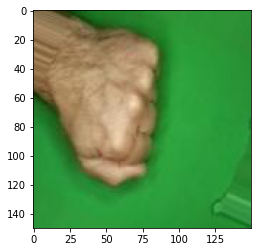

In [14]:
uploaded = files.upload()

for name in uploaded.keys():
  img = image.load_img(name, target_size=(150,150))
  image_plot = plt.imshow(img)
  image_arr = image.img_to_array(img)
  image_arr = np.expand_dims(image_arr, axis=0)

  images = np.vstack([image_arr]) 
  pred = model.predict(images, batch_size = 10)

  print(name)
  if pred[0][0]==1:
    print("paper")
  elif pred[0][1]==1:
    print("rock")
  else:
    print("scissors")